In [5]:
import sys

sys.path.append("../")  # go to parent dir

%load_ext autoreload
%autoreload 2


from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from ddmtools.analysis import DDM
from ddmtools.image.frame import Framestack
from ddmtools.types import IntensiveParameters

project_path = (Path(".") / "..").resolve()
data_path = project_path / "data"
# experiment_path = data_path / "2BD01_1__middle1"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
CROP_SIZE = (1024, 1024)

stack = Framestack.from_video(data_path / "0_5um.mp4", CROP_SIZE)

intensive_parameters = IntensiveParameters(
    framerate=30,
    temperature=300,
    micrometre_per_pixel=0.0969,
    viscosity=1e-3,
)

ddm = DDM(stack=stack, intensive_parameters=intensive_parameters)

# Preload
ddm.stack.load()

  0%|          | 0/541 [00:00<?, ?it/s]

[h264 @ 0x55dd77815e40] no frame!
[h264 @ 0x55dd77815e40] no frame!
[h264 @ 0x55dd77815e40] no frame!
[h264 @ 0x55dd77815e40] no frame!
[h264 @ 0x55dd77815e40] no frame!
[h264 @ 0x55dd77815e40] no frame!
[h264 @ 0x55dd77815e40] no frame!
[h264 @ 0x55dd77815e40] no frame!


Text(0.5, 0.98, 'Frame 1 - Frame 2')

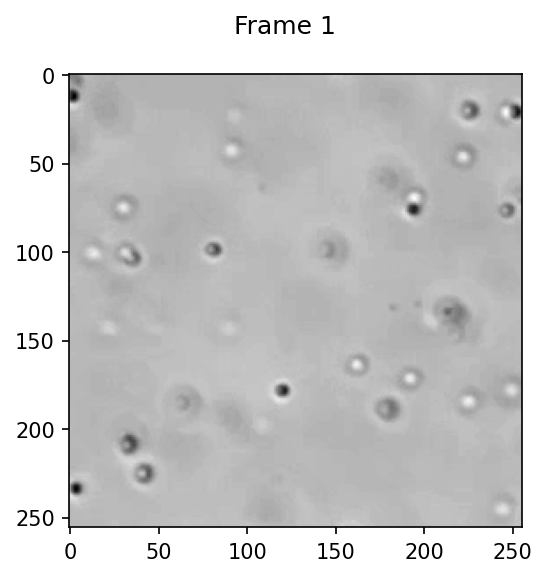

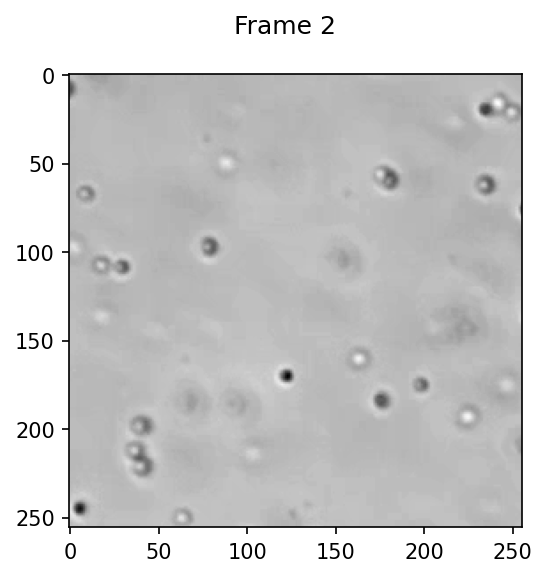

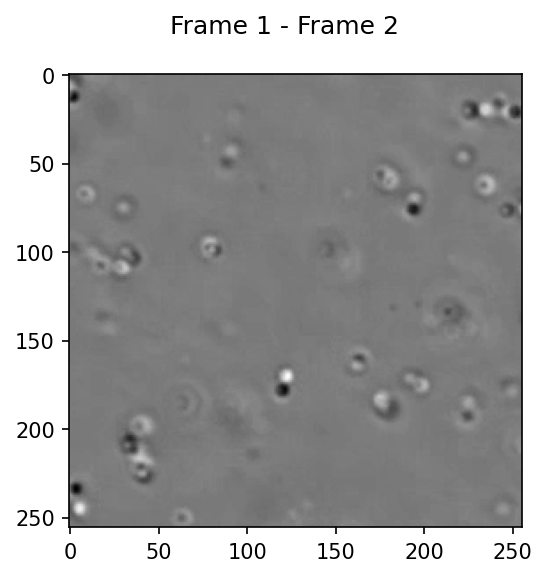

In [7]:
frame1 = ddm.stack[10]
frame2 = ddm.stack[20]

fig = plt.figure(dpi=150)
plt.imshow(frame1, plt.cm.gray)
fig.suptitle("Frame 1")

fig = plt.figure(dpi=150)
plt.imshow(frame2, plt.cm.gray)
fig.suptitle("Frame 2")

fig = plt.figure(dpi=150)
plt.imshow(frame1 - frame2, plt.cm.gray)
fig.suptitle("Frame 1 - Frame 2")

Text(0.5, 0.98, 'Differential Spectrum')

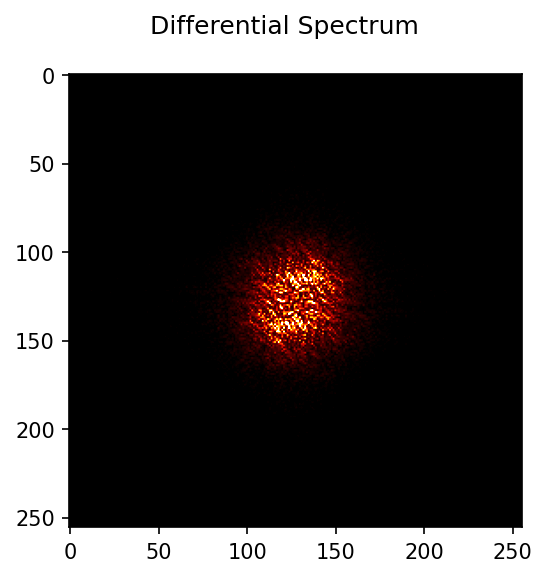

In [8]:
# Show a differential spectrum
diff = ddm.get_differential_spectrum(10, 20)
fig = ddm.plot_differential_spectrum(diff, 3)
fig.set_dpi(150)
fig.suptitle("Differential Spectrum")

Text(0.5, 0.98, 'Frame 1, Time averaged signal')

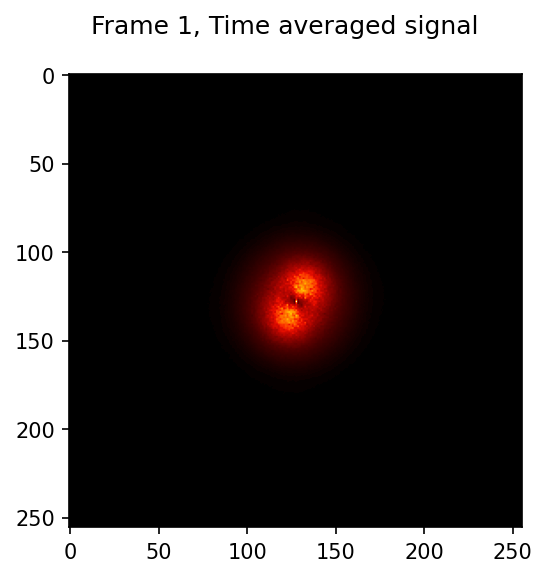

In [10]:
# Show time average
average = ddm.get_time_average(10, max_couples=300)

fig = ddm.plot_time_average(average, brightness=1.0)
fig.set_dpi(150)
fig.suptitle("Frame 1, Time averaged signal")

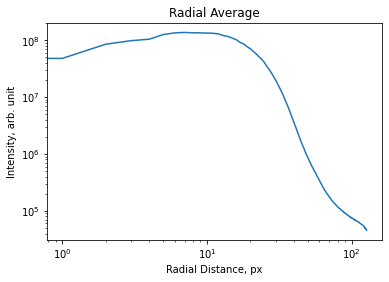

In [11]:
# Show radial average
# We can radially average since we expect isotropy

rad_average = ddm.get_radial_average(average)
fig = ddm.plot_radial_average(rad_average)
fig.set_dpi(150)

In [14]:
# taus = ddm.get_log_spaced_taus(300)
taus = np.array(range(len(ddm.stack)))

analysis = ddm.run(taus, max_couples=100)

  0%|          | 0/540 [00:00<?, ?it/s]

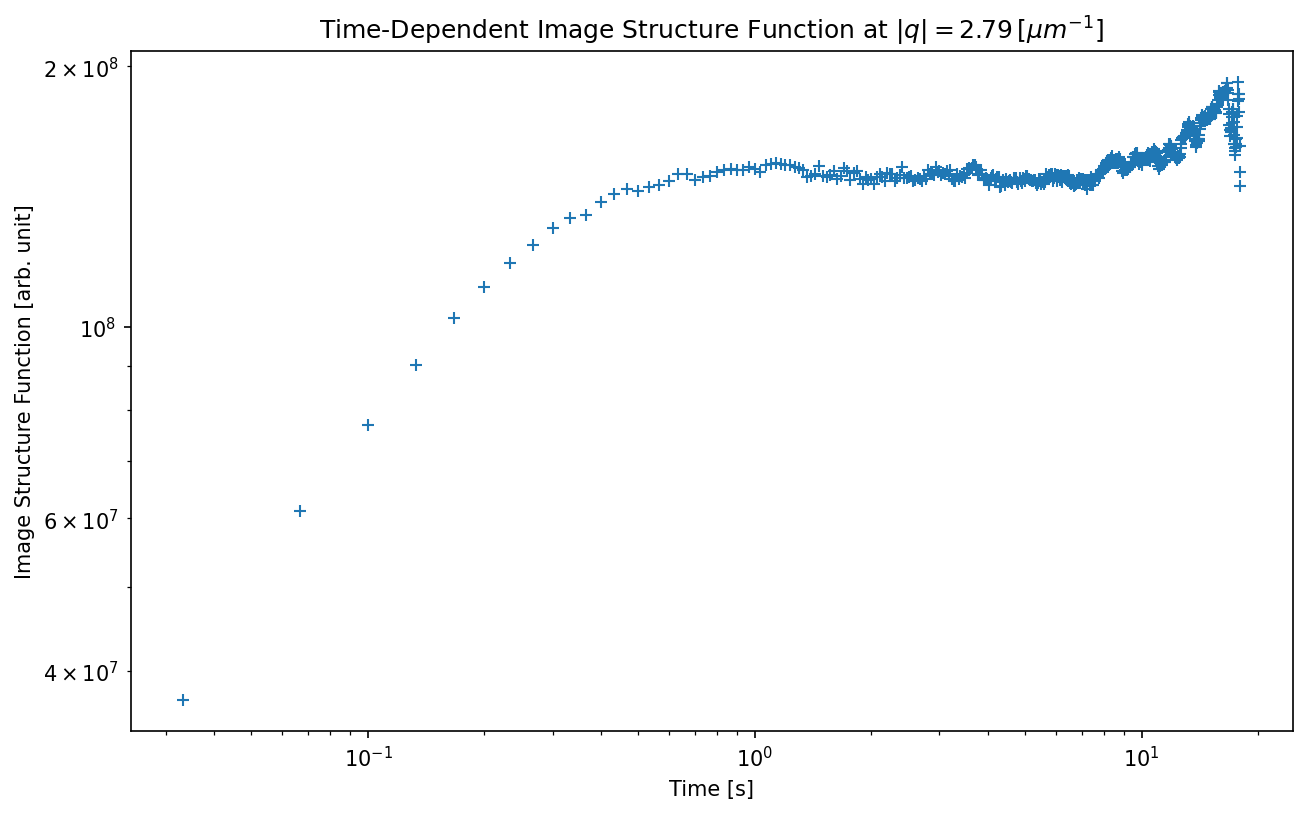

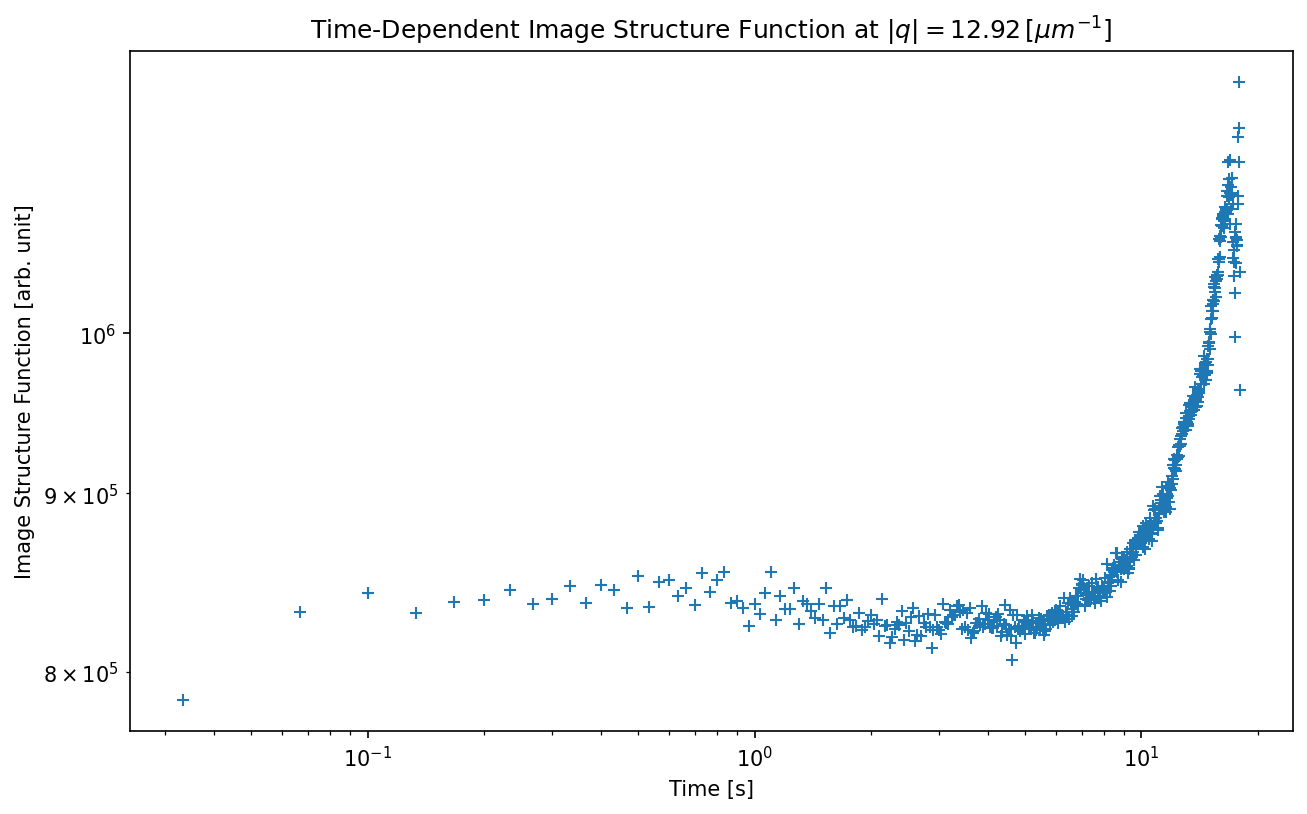

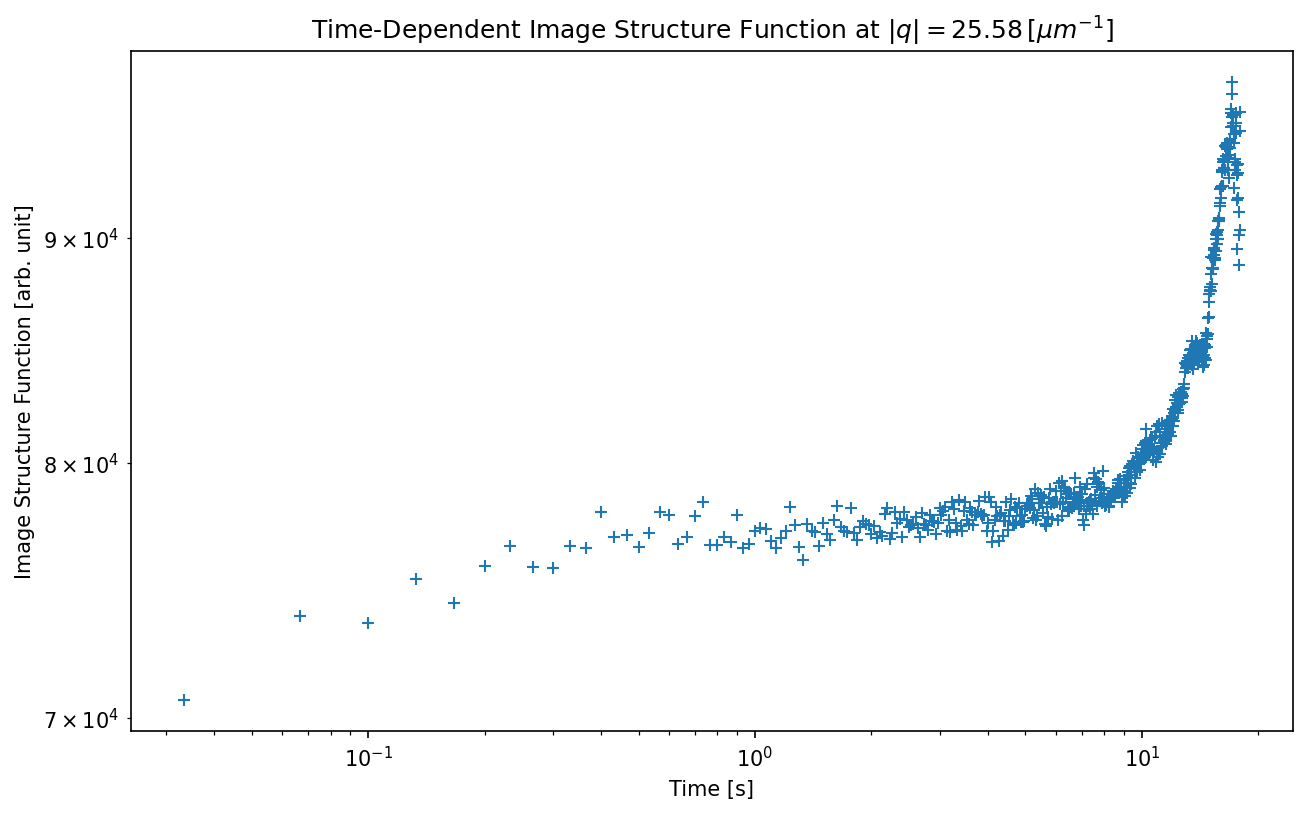

In [18]:
fig = analysis.plot_image_structure_function(10)
fig = analysis.plot_image_structure_function(50)
fig = analysis.plot_image_structure_function(100)

In [21]:
dispersity_order = 1
min_result = analysis.fit_image_structure_functions_polydisperse(
    dispersity_order, method_sequence=["least_squares"], max_nfev=50_000
)


print(f"Objective function evaluations: {min_result.minimizer_result.nfev}")

  0%|          | 0/50000 [00:00<?, ?it/s]

Doing fit 1/1 using method `least_squares`...


ValueError: Residuals are not finite in the initial point.

In [43]:
min_result.minimizer_result  # Warning: very verbose

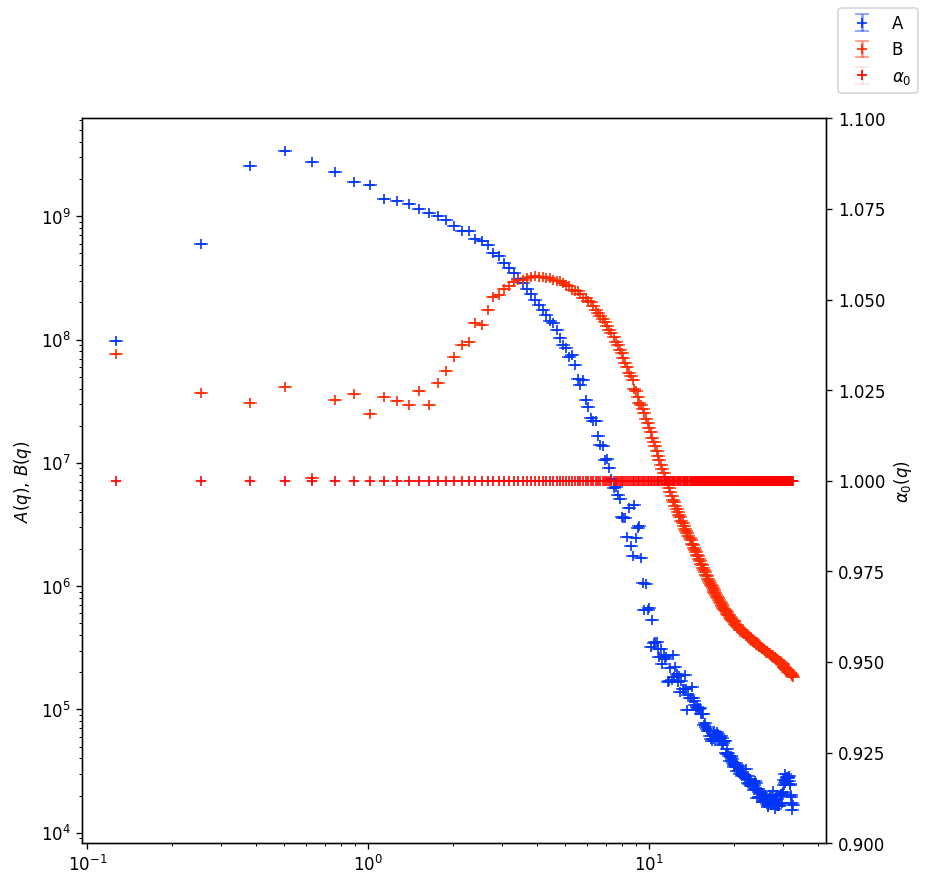

In [44]:
fig = min_result.plot_image_structure_function_params()

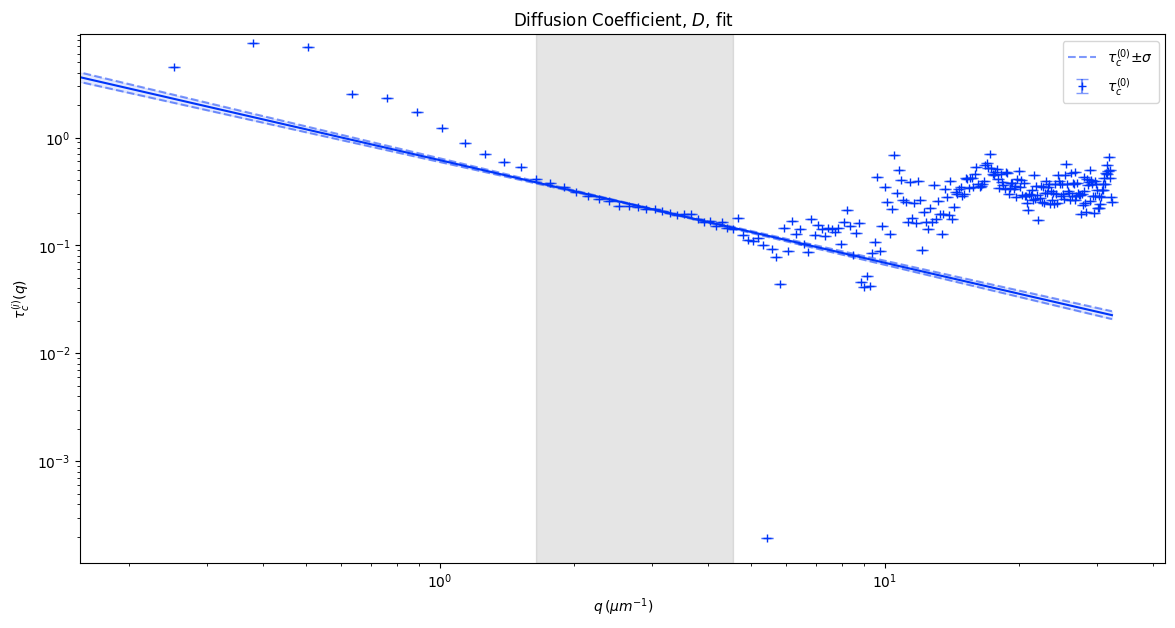

In [50]:
fit_result = min_result.fit_diffusion_coefficients(minimal_r_squared=0.97)
fig = fit_result.plot_diffusion_coeff_fit()

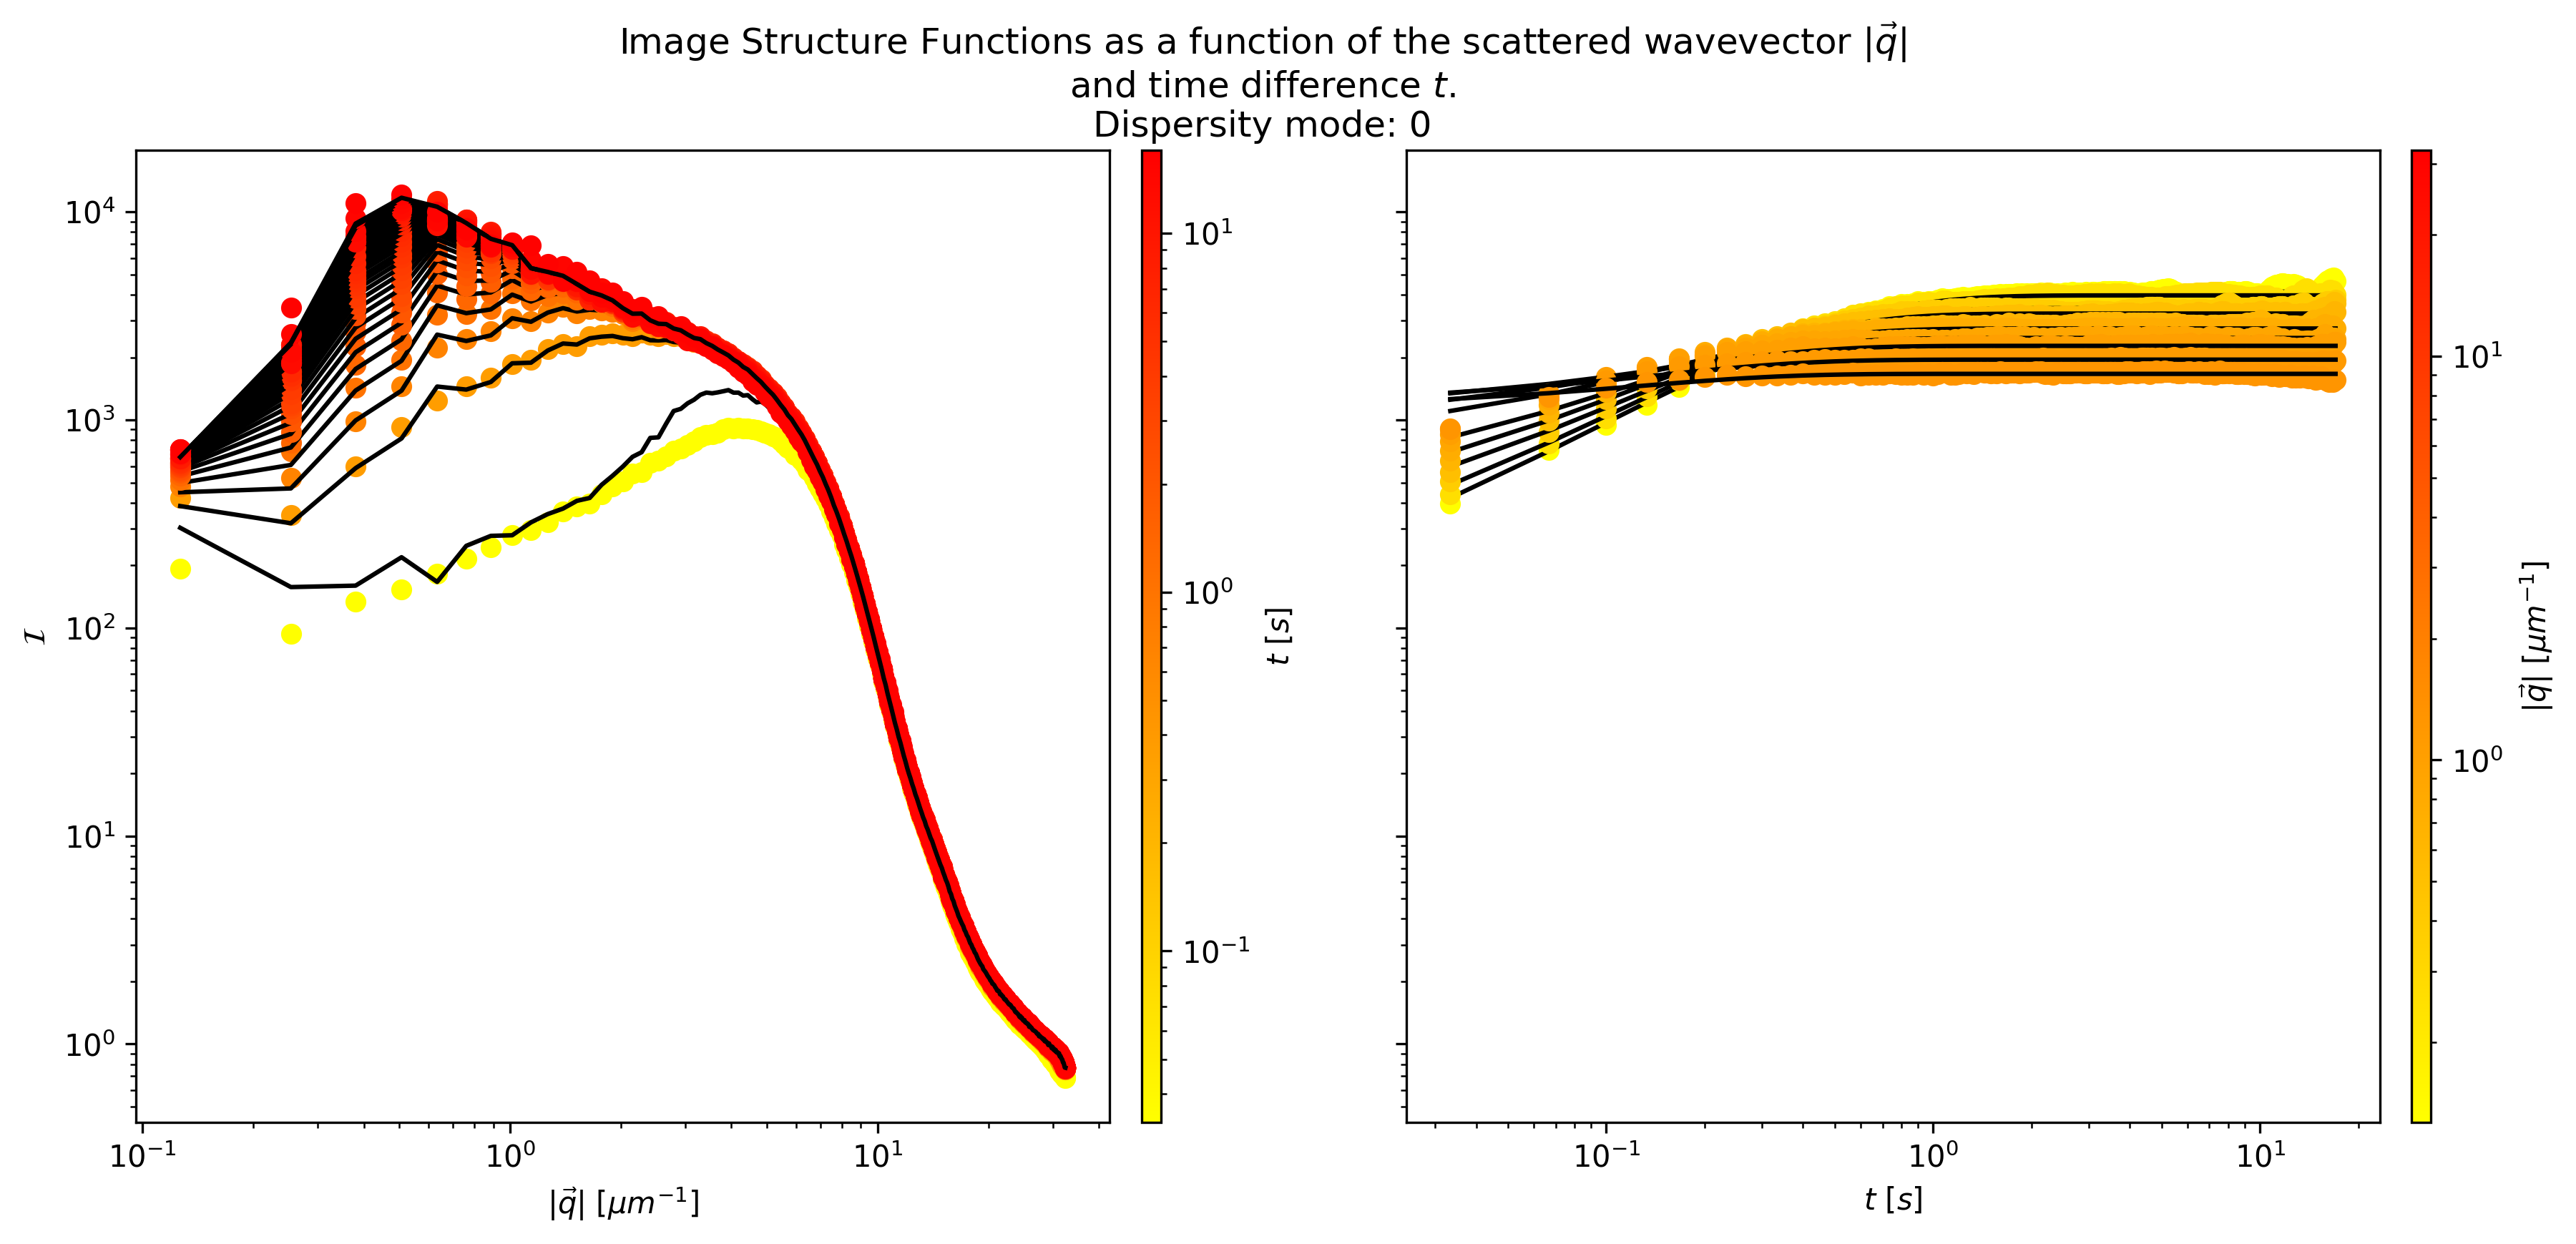

In [51]:
fig = fit_result.plot_image_structure_functions(q_interval=10)

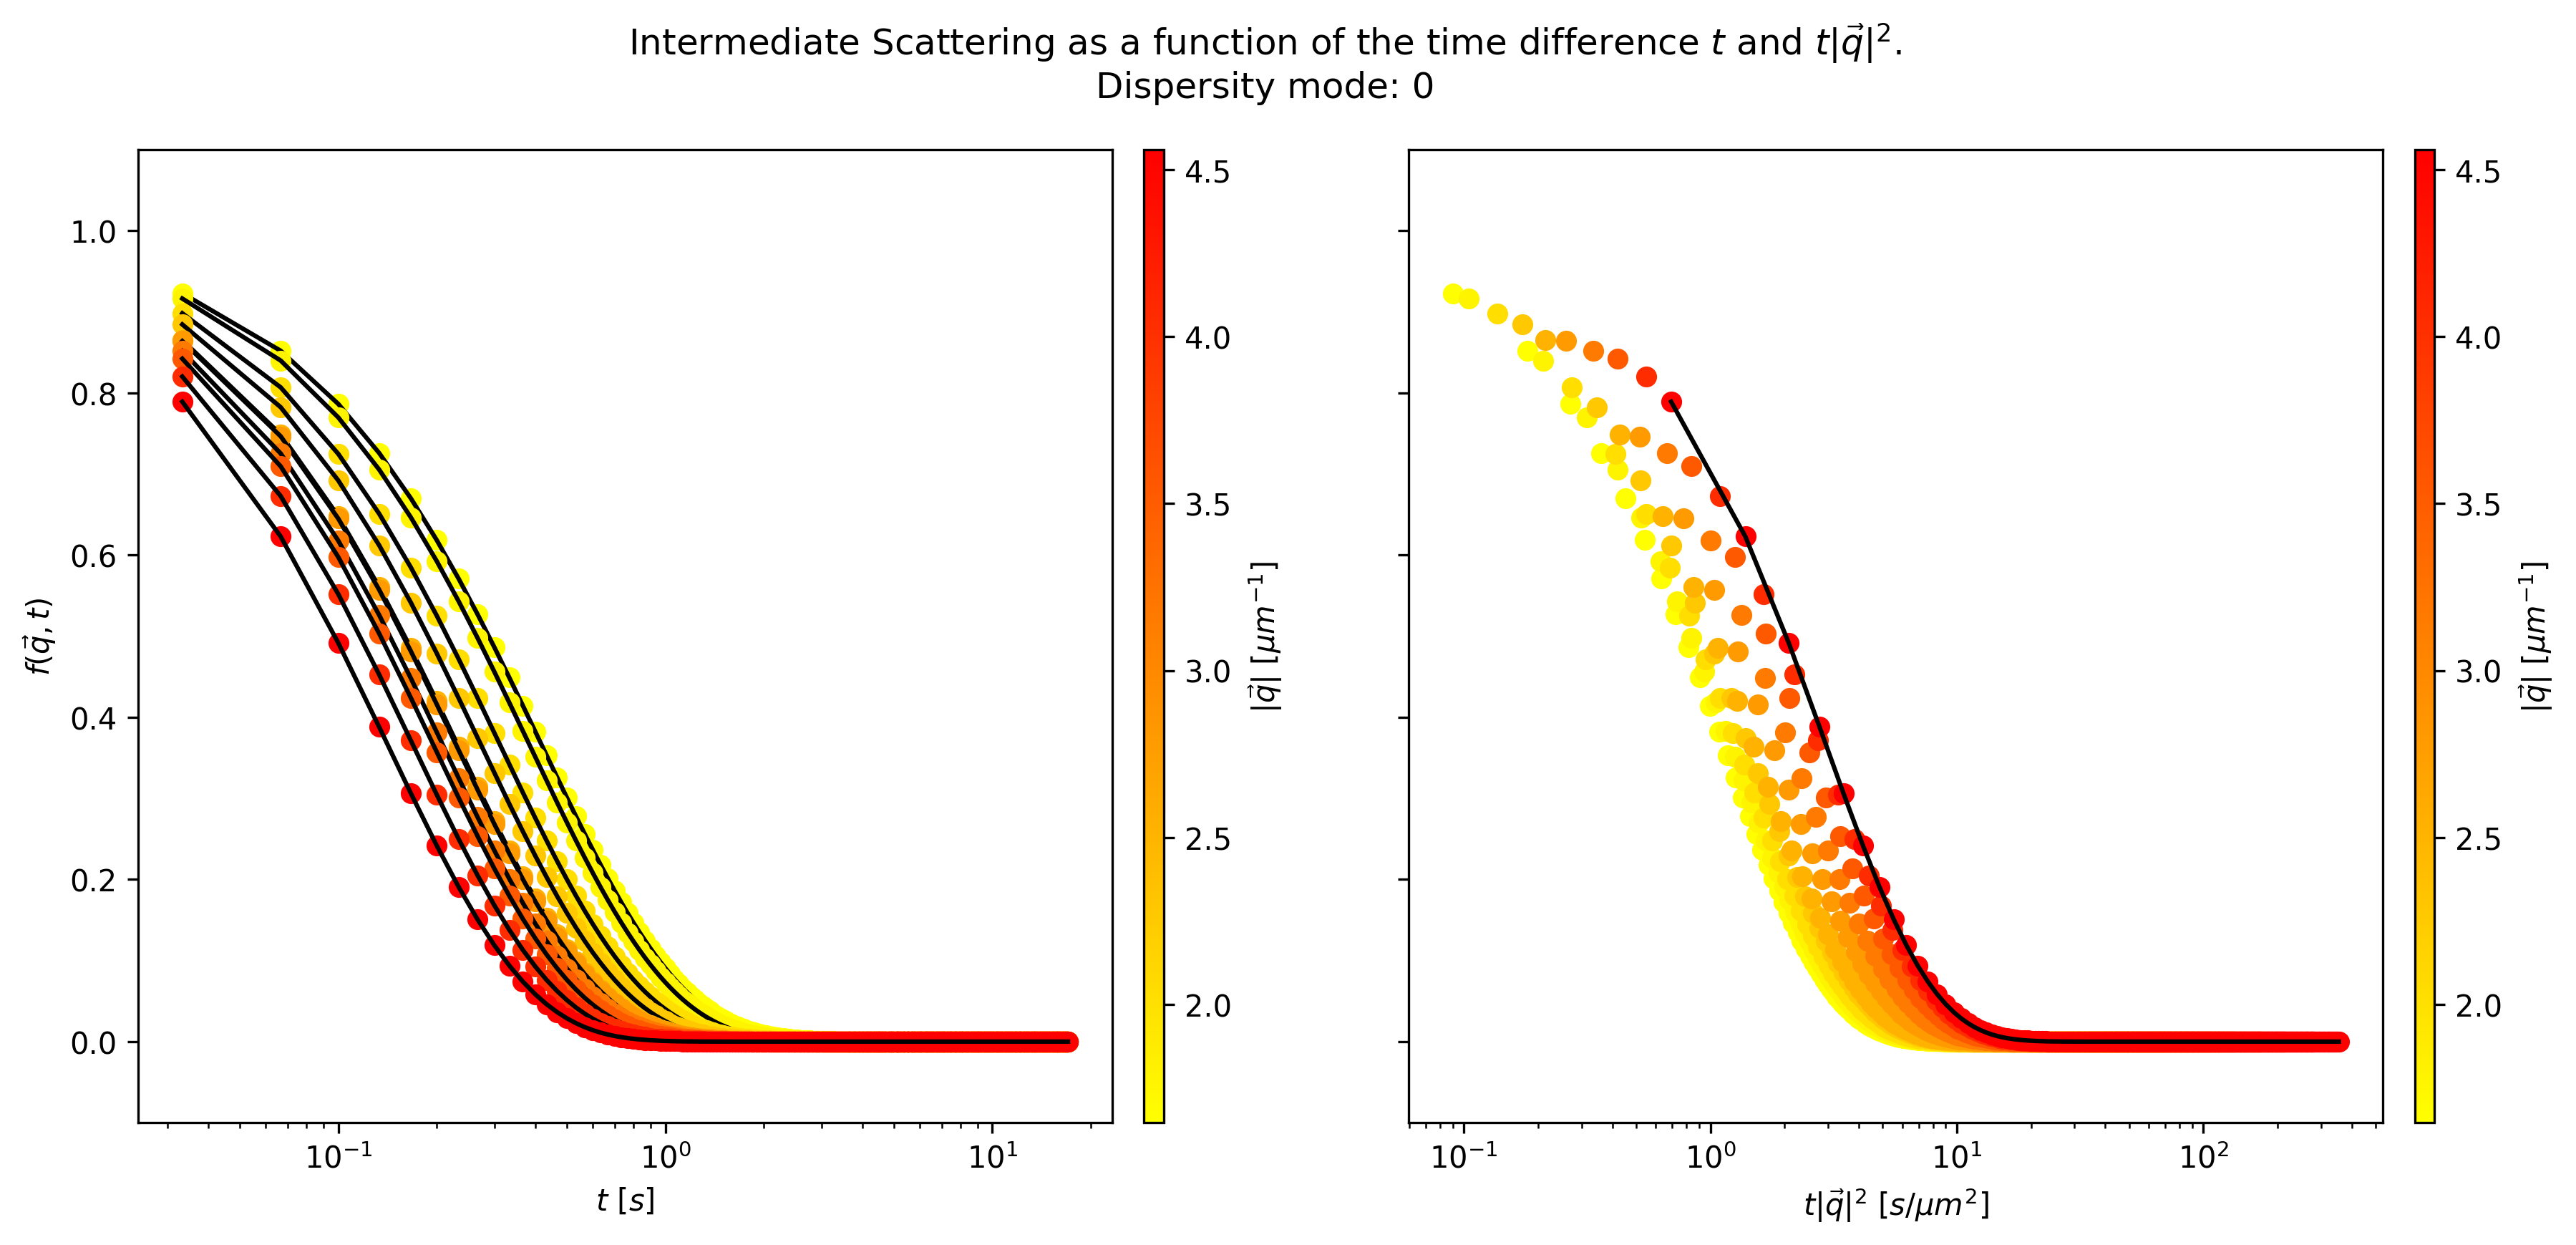

In [52]:
fig = fit_result.plot_intermediate_scattering_function(0)

In [53]:
print(fit_result.get_diffusion_coefficients())
print(fit_result.get_particle_diameters())

[1.6197443747031477+/-0.06068409902756563]
[9.632036526144191e-07+/-3.6086648456290367e-08]
